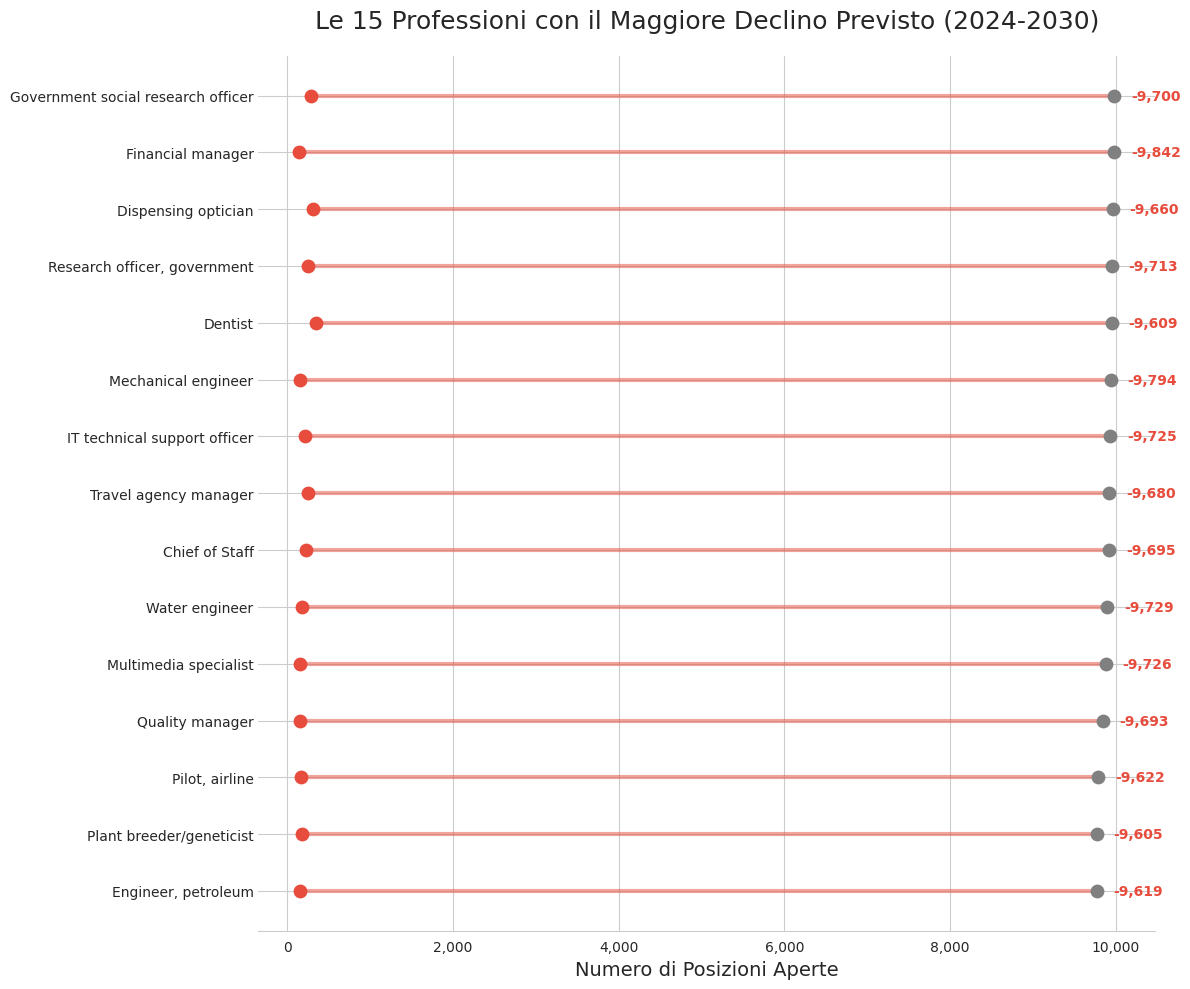

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = pd.read_csv("ai_job_dataset.csv")
fig, ax = plt.subplots(figsize=(12, 8))

seniority_mapping = {
    "EN": "Junior",
    "MI": "Mid-Level",
    "SE": "Senior",
    "EX": "Expert"
}

df['experience_level_mapped'] = df['experience_level'].map(seniority_mapping)

average_salary = df.groupby('experience_level_mapped')['salary_usd'].mean()
order = ["Junior", "Mid-Level", "Senior", "Expert"]

ordered_salaries = average_salary.reindex(order)
ordered_salaries.plot.barh(ax=ax, color="#e67cb9", legend=False)

ax.invert_yaxis()
ax.set_title('Salario Medio Annuo (USD) per Livello di Esperienza nel Settore AI', fontsize=18, pad=20)
ax.set_xlabel('Salario Medio in USD', fontsize=14)
ax.set_ylabel('Livello di Esperienza', fontsize=14)

formatter = mticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}k')
ax.xaxis.set_major_formatter(formatter)

for index, value in enumerate(ordered_salaries):
    ax.text(value, index, f' ${value:,.0f}', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.savefig("SalarioMedioSeniority.png")
plt.show()